# Random Forest Regression

- Diyelim ki binlerce rastgele kişiye karmaşık bir soru sordunuz ve cevaplarını topladınız, çoğu durumda bu toplu yanıtın bir uzman yanıtından daha iyi oldugunu göreceksiniz.
- Buna kalabalığın bilgeliği (wisdom of crowd) denir.
- Benzer şekilde bir grup tahmin edicinin (classifier/regrossors) tahminlerini toplarsanız, genellikle en iyi bireysel tahmin edicilerden daha iyi tahminler alırsınız.
- Bir grup tahmin ediciye topluluk (ensemble) denir. Bu tekniğe ise <strong>Ensemble Learning</strong> denir.

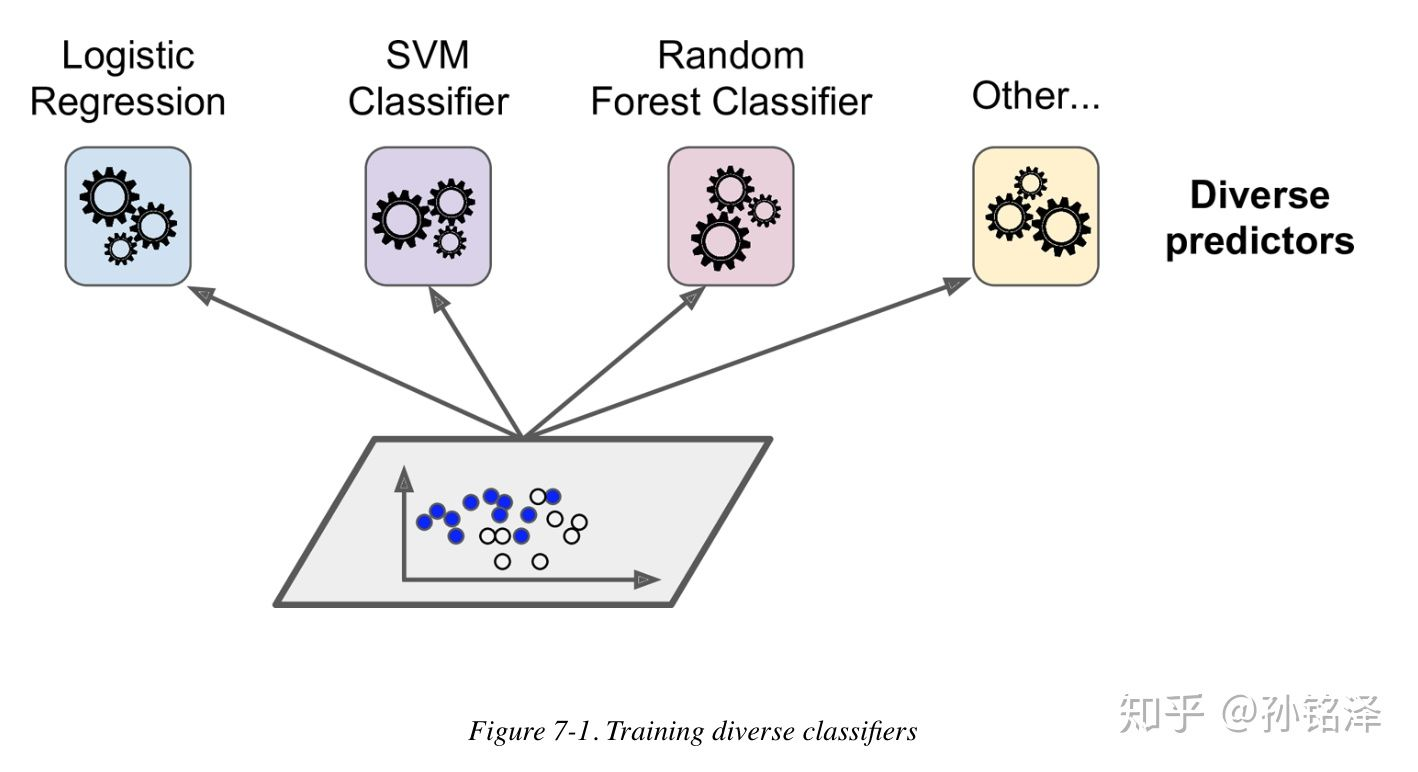

In [11]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Regression/RandomForestRegression/foto/el.jpeg') 

 Random forest algoritması birbirinden bağımsız olarak çalışan birçok karar ağacının bir araya gelerek aralarından en yüksek puan alan değerin seçilmesi işlemidir.

Random forest regresyon birden fazla karar ağacını kullanarak daha uyumlu modeller üreterek isabetli tahminlerde bulunmaya yarayan bir regresyon modelidir. Karar ağaçlarını kullandığı için kesiklidir. Yani belli bir aralıkta istenen tahminler için aynı sonuçları üretir. 

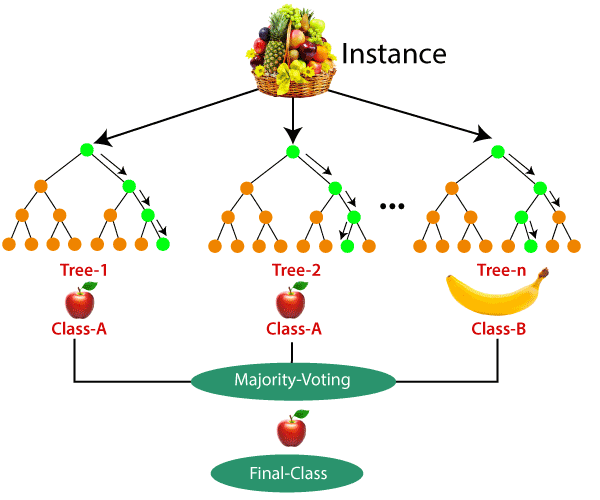

In [1]:
from IPython.display import Image
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Regression/RandomForestRegression/foto/rfa.png') 

- Datamdan n sayıda sample seçiyorum ve subdata elde ediyorum.
- Bunu treelerde eğitiyorum her tree bir sonuç çıkarıyor, çoğunluğun oyu ile sonucu buluyorum.

Random Forest Regression ile, 
- body part classification
- stock price prediction
- tavsiye sistemleri <br>
çalışılıyor.

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df=pd.read_csv('/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Regression/RandomForestRegression/data/random+forest+regression+dataset.csv',sep=";",header=None)

- Verisetimiz tribündeki 1. seviyeden başlayarak 10. seviyeye kadar olan ucuzdan pahalıya bilet ücretleri yer almaktadır.
- x' de seviyeler
- y' de ücretler tutulmaktadır.

In [8]:
df.head() 

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50


In [12]:
x = df.iloc[:,0].values.reshape(-1,1) #numpya çevirdik ve ,1 koyduk
y = df.iloc[:,1].values.reshape(-1,1) #numpya çevirdik ve ,1 koyduk

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42 )

- n_estimator = 100 kullandığımız ağaç sayısı demek.
- random_state = 42 ise datamdan n sayıda sample seçtiğimizden bahsetmiştik burada rastgele bir seçim uygulanıyor ve her run ettiğimde farklı sonuçlar görüyorum, ama random_state kullanırsak (istediğimizi yazabiliriz ama genelde 42 kullanılıyor.) bize hep aynı sonucu verir hep aynı sample'ları seçer.

In [14]:
rf.fit(x,y)

/var/folders/pc/gs0lq1w52r16_wgx9vm4wxhm0000gn/T/ipykernel_15009/2439990766.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestRegressor(random_state=42)

In [15]:
print("7.8 seviyesinde fiyatın ne kadar olduğu:",rf.predict([[7.8]]))

7.8 seviyesinde fiyatın ne kadar olduğu: [22.7]


In [17]:
x_= np.arange(min(x),max(x),0.01).reshape(-1,1)
y_pred=rf.predict(x_)

- her bir x değeri için benim y_pred'imi hesapla
- y_head = x değerlerini kullanarak predict ettiğim sonuçlarım

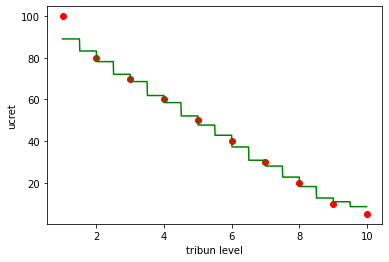

In [19]:
#visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_pred,color="green")
plt.xlabel("tribun level")
plt.ylabel("ucret")
plt.show()

- bunun decision tree'den farkı bir tane tree kullanacağımız yere 100 tane tree kullandım.
- tabiki 100 tane decision tree bir taneden daha iyidir